Free Ollama GraphRag with Llama 3.2 currently

Inspired by: https://github.com/NirDiamant/RAG_Techniques/blob/main/all_rag_techniques_runnable_scripts/graph_rag.py

### Building a Graph-based System for Database Understanding and Analysis

Creating a system that leverages a knowledge graph to understand and interact with databases is an excellent application of the `GraphRAG` framework. This system can assist in understanding existing database structures, answering questions related to schema design, and helping identify duplicates or inefficiencies in the data. Here’s a deep dive into how this could be built:

---

### **1. Problem Definition and Use Cases**

The goal is to create a graph-based system that ingests database schemas, table relationships, and metadata to:

1. **Understand Database Structures**:
   - Provide insights into the overall structure of the database.
   - Highlight relationships between tables and columns.
   - Visualize database schemas and dependencies.

2. **Assist in Schema Design**:
   - Suggest new tables based on existing data.
   - Recommend optimal schema designs for new data that needs to be added.

3. **Identify Duplicates and Redundant Information**:
   - Detect tables or columns with similar purposes.
   - Recommend merging strategies for redundant tables.
   - Identify and highlight data duplication issues.

4. **Answer Complex Database-related Queries**:
   - Handle questions like, “How can I create a new table using the `Sales` and `Product` tables?” or “What are the dependencies for the `Order` table?”

---

### **2. Understanding the System Architecture**

The architecture can be broken down into several core components, each responsible for a distinct task:

#### 2.1 **Database Ingestion and Metadata Processing**
- **Input:**
  - Database schemas, table relationships, column descriptions, and metadata.
  - Optionally, sample data can be used to understand the distribution and relationships within columns.

- **Processing:**
  - Parse the schema files or connect directly to the database to extract metadata such as table names, columns, data types, constraints, primary keys, foreign keys, and indices.
  - Extract inter-table relationships and dependencies.

- **Output:**
  - A structured representation of the database in a graph format, where:
    - **Nodes** represent tables, columns, and constraints.
    - **Edges** represent relationships such as foreign keys, joins, or dependencies.

#### 2.2 **Graph Construction and Concept Mapping**
- Use a **graph database** (e.g., Neo4j) or an in-memory graph library (e.g., `networkx`) to build the knowledge graph:
  - Each table is a node with properties like table name, number of rows, and table description.
  - Each column is a sub-node or an attribute of a table node, with properties like column type, constraints, and indices.
  - Relationships (edges) indicate joins or foreign key dependencies, with weights assigned based on their strength or frequency of use in queries.

#### 2.3 **Query Engine for Schema and Data Analysis**
- Implement a **Query Engine** that:
  - Can interpret complex database-related questions (e.g., "How do I join the `Sales` table with the `Customer` table?").
  - Suggests optimal joins or schema modifications based on existing data and metadata.
  - Generates new SQL queries or schema suggestions.

#### 2.4 **Analysis and Deduplication Module**
- This module will leverage graph traversal techniques and similarity measures to identify:
  - Duplicates of tables or columns based on data content, column names, and use cases.
  - Recommendations for merging or restructuring tables.

#### 2.5 **Visualization and Interactive Exploration**
- The visualization component should:
  - Use graph-based visualization tools like `networkx`, `plotly`, or web-based frameworks like D3.js.
  - Provide an interactive interface for exploring table relationships, schema structures, and dependencies.

---

### **3. Deep Dive into Key Concepts**

To understand how each component contributes to the overall system, let’s dive into some core ideas and their implementation details:

#### 3.1 **Graph Construction for Database Representation**
- **Nodes**:
  - Table nodes contain metadata such as table name, description, and constraints.
  - Column nodes include data type, indices, and constraints.
  - Constraint nodes (e.g., primary keys) and relationships (e.g., joins) are first-class entities in the graph to represent dependency paths.

- **Edges**:
  - Direct relationships between tables (e.g., foreign key relationships) can be weighted based on the number of joins or queries involving these tables.
  - Semantic relationships between columns (e.g., columns storing similar data across tables) can be used to suggest potential schema merging or reorganization.

#### 3.2 **Leveraging Embeddings and Similarity Analysis for Columns and Tables**
- Use column and table metadata to generate **vector embeddings**:
  - For each column, consider features like data type, column name, and constraints to create a feature vector.
  - For each table, use the embeddings of its columns, aggregated using methods like mean or attention-based pooling, to create a table embedding.

- **Similarity Analysis**:
  - Compare column and table embeddings to identify redundancies or similar entities.
  - Use cosine similarity or other distance measures to detect potential duplicates or suggest schema modifications.

#### 3.3 **Handling Queries for Schema Suggestions and Modifications**
- Implement a query parser that understands database-related questions:
  - Use natural language processing to interpret the query and map it to database entities (e.g., "Which columns are similar to `CustomerID` in the `Order` table?" can be mapped to searching for columns with similar names or data types).

- For complex queries, implement a graph traversal algorithm to:
  - Trace dependencies and joins between tables.
  - Suggest new schema elements or query modifications based on existing relationships.

#### 3.4 **Deduplication and Schema Optimization Module**
- This module will focus on:
  - **Column Duplication**: Identify columns that serve similar purposes across different tables. E.g., if `CustomerName` exists in both `Orders` and `Sales` tables, consider centralizing it.
  - **Table Deduplication**: Identify tables with overlapping purposes or contents. Suggest merging or restructuring strategies.
  - **Unused or Rarely Accessed Tables**: Highlight tables or columns that are infrequently used in queries or have limited relevance.

---

### **4. Detailed Implementation Strategy**

Let’s look at a high-level plan to implement this system step-by-step:

1. **Database Schema Ingestion:**
   - Connect to the database using a standard library like `sqlalchemy` or directly parse the schema definition files (e.g., `.sql` or `.dbml` files).
   - Create initial nodes for each table and their columns with metadata as node attributes.

2. **Graph Construction:**
   - Use a library like `networkx` to represent the schema as a graph.
   - For each table, create nodes for the table and its columns.
   - For each relationship (e.g., foreign key), create an edge between table nodes.

3. **Concept Extraction and Embedding:**
   - Use a language model or text-based embeddings to capture the semantics of table and column names.
   - Build table and column embeddings, store them as node attributes.

4. **Query Handling and Traversal:**
   - Create a query engine that leverages graph traversal to answer schema-related questions.
   - Implement context expansion techniques (similar to GraphRAG) to traverse through related nodes and gather context for answering complex questions.

5. **Deduplication Analysis:**
   - Use graph-based similarity measures to detect duplicates and redundancies.
   - Implement a scoring mechanism to suggest merging or restructuring.

6. **Visualization and Interaction:**
   - Use `matplotlib`, `plotly`, or a web-based graph visualization library to provide an interactive interface.
   - Allow users to query, explore, and understand the database schema through an intuitive graphical interface.

---

### **5. Challenges and Considerations**

1. **Handling Large Databases**: If the database has thousands of tables and millions of columns, the graph can become very large. Strategies like lazy loading, selective traversal, and graph pruning will be needed.

2. **Metadata Consistency**: Ensuring that metadata is up-to-date and correctly represents the database can be challenging, especially if the schema changes frequently.

3. **Understanding Semantics**: Automatically understanding the purpose of columns or tables based on just names and types can be difficult. Advanced language models or knowledge bases might be required to enhance semantic understanding.

4. **Performance Optimization**: Traversing large graphs and performing complex similarity calculations can be resource-intensive. Efficient data structures and parallel processing might be needed.

---

### **6. Future Extensions**

- **Integrate with Real-time Query Analysis**: Capture live query logs and update the graph in real-time based on query patterns and table usage.
- **Leverage Machine Learning for Schema Recommendations**: Use historical data and query patterns to train models that can suggest schema optimizations.
- **Add Support for Multiple Databases**: Handle scenarios where multiple databases need to be analyzed together, such as in a data warehouse or federated database scenario.

---

This system can be a powerful tool for organizations looking to streamline their data management processes, optimize schema designs, and gain deeper insights into their database structures.

In [1]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, ForeignKey
import networkx as nx
import matplotlib.pyplot as plt

# Create two SQLite databases in memory for demonstration
engine1 = create_engine('sqlite:///example1.db')  # Example Database 1
engine2 = create_engine('sqlite:///example2.db')  # Example Database 2

metadata1 = MetaData()
metadata2 = MetaData()

# Define tables for the first database
Table('employees', metadata1,
      Column('id', Integer, primary_key=True),
      Column('name', String),
      Column('department', String),
      Column('salary', Integer),
      Column('manager_id', Integer, ForeignKey('managers.id'))
      )

Table('managers', metadata1,
      Column('id', Integer, primary_key=True),
      Column('name', String),
      Column('department', String)
      )

Table('departments', metadata1,
      Column('id', Integer, primary_key=True),
      Column('name', String),
      Column('location', String)
      )

# Define tables for the second database
Table('staff', metadata2,
      Column('id', Integer, primary_key=True),
      Column('full_name', String),  # Similar to `employees.name`
      Column('dept', String),        # Similar to `employees.department`
      Column('wage', Integer),       # Similar to `employees.salary`
      Column('supervisor_id', Integer, ForeignKey('supervisors.id'))
      )

Table('supervisors', metadata2,
      Column('id', Integer, primary_key=True),
      Column('full_name', String),  # Similar to `managers.name`
      Column('dept', String)        # Similar to `managers.department`
      )

Table('office_locations', metadata2,
      Column('id', Integer, primary_key=True),
      Column('office_name', String),  # Similar to `departments.name`
      Column('address', String)       # Similar to `departments.location`
      )

# Create the tables in the databases
metadata1.create_all(engine1)
metadata2.create_all(engine2)


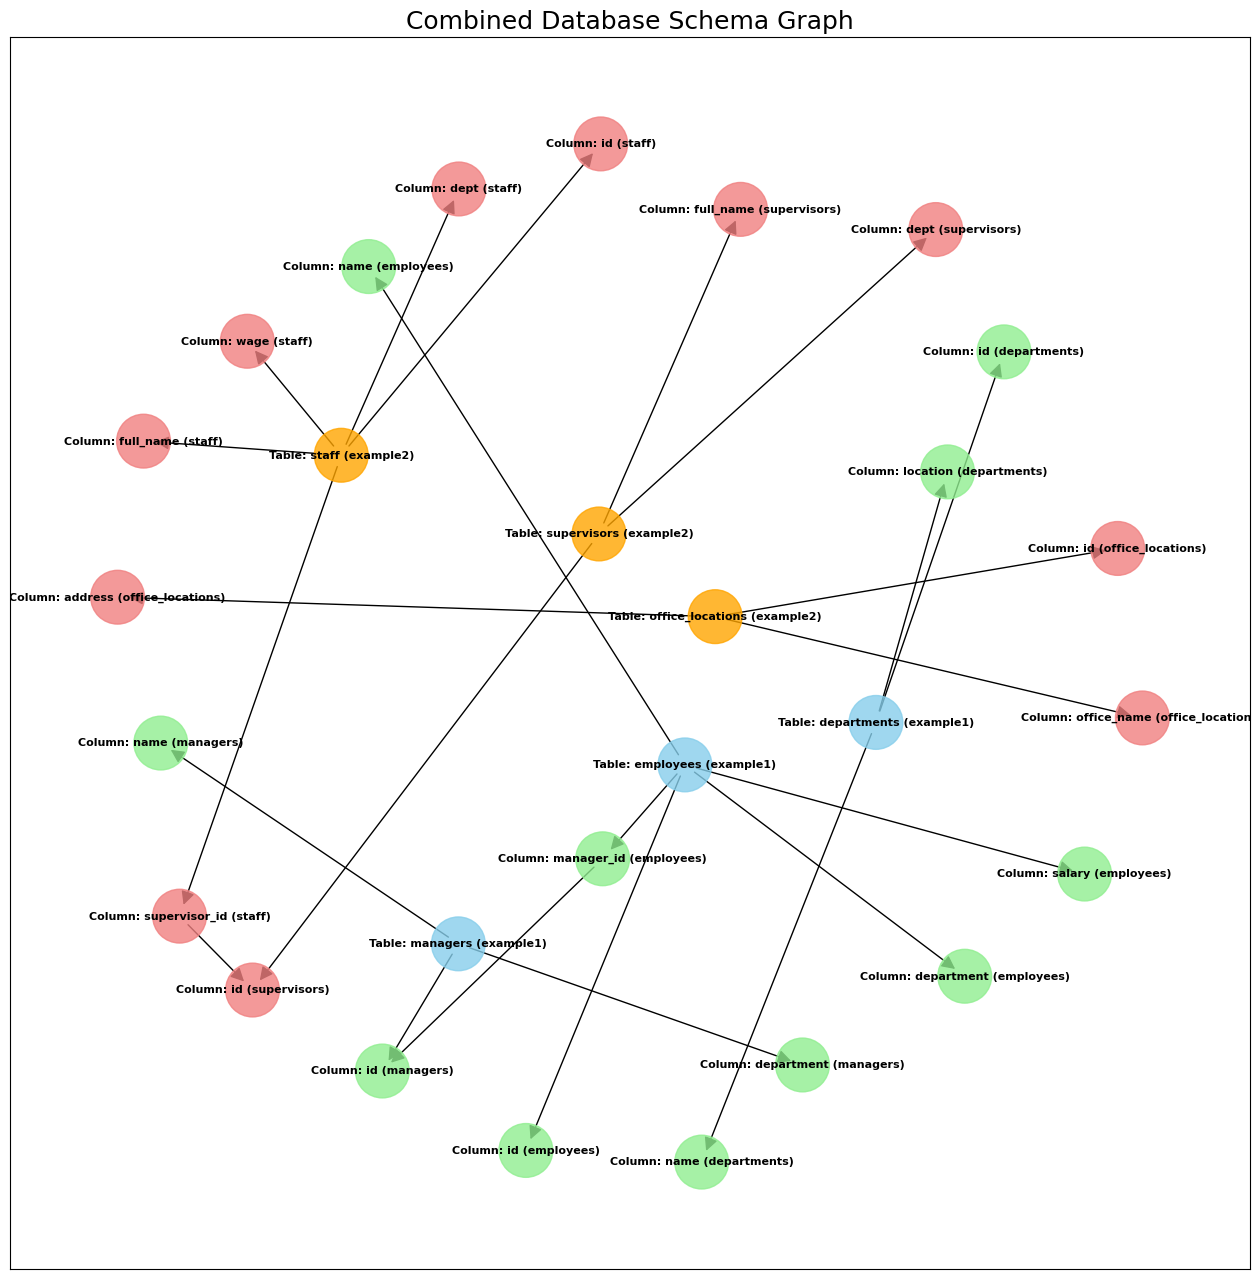

In [2]:
# Read metadata for both databases
metadata1.reflect(bind=engine1)
metadata2.reflect(bind=engine2)

# Create a new directed graph for both databases combined
graph = nx.DiGraph()

# Add nodes and edges for both databases
def add_metadata_to_graph(metadata, db_name):
    for table_name, table in metadata.tables.items():
        # Add table node with a unique label including the database name
        table_node = f"{db_name}.{table_name}"
        graph.add_node(table_node, type="table", db=db_name, label=f"Table: {table_name} ({db_name})")
        
        for column in table.columns:
            # Add column node with a unique identifier including the table and database names
            column_node_id = f"{db_name}.{table_name}.{column.name}"
            graph.add_node(column_node_id, type="column", db=db_name, label=f"Column: {column.name} ({table_name})", data_type=str(column.type))
            
            # Add edge from table to column
            graph.add_edge(table_node, column_node_id, relationship="contains")

    # Add foreign key edges
    for table_name, table in metadata.tables.items():
        for fk in table.foreign_keys:
            parent_column = f"{db_name}.{fk.parent.table.name}.{fk.parent.name}"  # Source column with db prefix
            referenced_column = f"{db_name}.{fk.column.table.name}.{fk.column.name}"  # Target column with db prefix
            graph.add_edge(parent_column, referenced_column, relationship="foreign_key")


# Add both databases to the graph
add_metadata_to_graph(metadata1, "example1")
add_metadata_to_graph(metadata2, "example2")

# Visualize the combined graph
# Define node colors based on type (table or column)
node_colors = []
for node, attrs in graph.nodes(data=True):
    if attrs['type'] == 'table':
        node_colors.append('skyblue' if attrs['db'] == "example1" else 'orange')
    elif attrs['type'] == 'column':
        node_colors.append('lightgreen' if attrs['db'] == "example1" else 'lightcoral')

# Draw the combined graph
pos = nx.spring_layout(graph, k=0.5, iterations=50)
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=1500, alpha=0.8)
nx.draw_networkx_labels(graph, pos, labels=nx.get_node_attributes(graph, 'label'), font_size=8, font_weight='bold')
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(data=True), arrowstyle='-|>', arrowsize=20, edge_color='black')
plt.title("Combined Database Schema Graph", fontsize=18)
plt.show()


In [3]:
# Identify similar column names across tables
def find_similar_columns(graph):
    column_nodes = [node for node, attrs in graph.nodes(data=True) if attrs['type'] == 'column']
    similar_columns = {}

    for i, column1 in enumerate(column_nodes):
        for column2 in column_nodes[i+1:]:
            if column1 != column2 and graph.nodes[column1]['data_type'] == graph.nodes[column2]['data_type']:
                # Check if column names are similar
                col_name1 = column1.split(".")[-1].lower()
                col_name2 = column2.split(".")[-1].lower()
                
                # If column names or data types are similar, group them
                if col_name1 == col_name2:
                    if col_name1 not in similar_columns:
                        similar_columns[col_name1] = []
                    similar_columns[col_name1].append((column1, column2))

    return similar_columns

# Print out similar columns found
similar_columns = find_similar_columns(graph)
for col, columns in similar_columns.items():
    print(f"Similar Columns Group: {col}")
    for column_pair in columns:
        print(f" - {column_pair[0]} <-> {column_pair[1]}")


Similar Columns Group: id
 - example1.employees.id <-> example1.managers.id
 - example1.employees.id <-> example1.departments.id
 - example1.employees.id <-> example2.staff.id
 - example1.employees.id <-> example2.supervisors.id
 - example1.employees.id <-> example2.office_locations.id
 - example1.managers.id <-> example1.departments.id
 - example1.managers.id <-> example2.staff.id
 - example1.managers.id <-> example2.supervisors.id
 - example1.managers.id <-> example2.office_locations.id
 - example1.departments.id <-> example2.staff.id
 - example1.departments.id <-> example2.supervisors.id
 - example1.departments.id <-> example2.office_locations.id
 - example2.staff.id <-> example2.supervisors.id
 - example2.staff.id <-> example2.office_locations.id
 - example2.supervisors.id <-> example2.office_locations.id
Similar Columns Group: name
 - example1.employees.name <-> example1.managers.name
 - example1.employees.name <-> example1.departments.name
 - example1.managers.name <-> example1.d

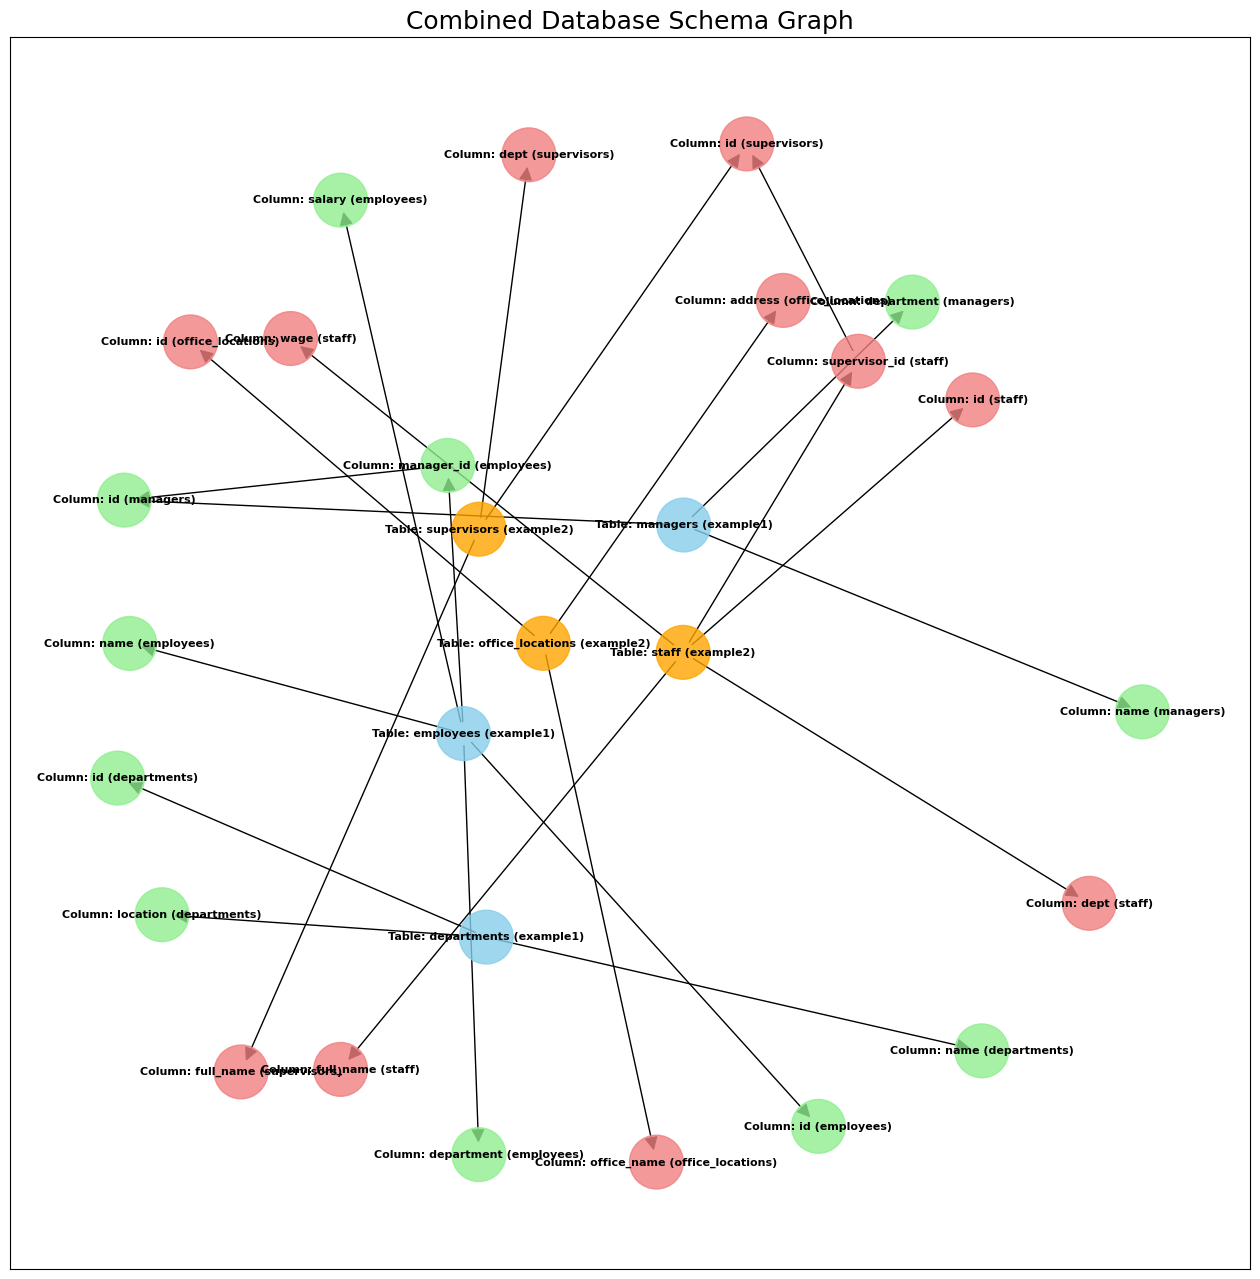

In [4]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, ForeignKey
import networkx as nx
import matplotlib.pyplot as plt
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage, SystemMessage
import pandas as pd

# Step 1: Create and Connect to Databases
engine1 = create_engine('sqlite:///example1.db')
engine2 = create_engine('sqlite:///example2.db')

metadata1 = MetaData()
metadata2 = MetaData()

# Define tables for the first database
Table('employees', metadata1,
      Column('id', Integer, primary_key=True),
      Column('name', String),
      Column('department', String),
      Column('salary', Integer),
      Column('manager_id', Integer, ForeignKey('managers.id'))
      )

Table('managers', metadata1,
      Column('id', Integer, primary_key=True),
      Column('name', String),
      Column('department', String)
      )

Table('departments', metadata1,
      Column('id', Integer, primary_key=True),
      Column('name', String),
      Column('location', String)
      )

# Define tables for the second database
Table('staff', metadata2,
      Column('id', Integer, primary_key=True),
      Column('full_name', String),
      Column('dept', String),
      Column('wage', Integer),
      Column('supervisor_id', Integer, ForeignKey('supervisors.id'))
      )

Table('supervisors', metadata2,
      Column('id', Integer, primary_key=True),
      Column('full_name', String),
      Column('dept', String)
      )

Table('office_locations', metadata2,
      Column('id', Integer, primary_key=True),
      Column('office_name', String),
      Column('address', String)
      )

# Create the tables in the databases
metadata1.create_all(engine1)
metadata2.create_all(engine2)

# Read metadata for both databases
metadata1.reflect(bind=engine1)
metadata2.reflect(bind=engine2)

# Create a new directed graph for both databases combined
graph = nx.DiGraph()

# Function to add database metadata to the graph
def add_metadata_to_graph(metadata, db_name):
    for table_name, table in metadata.tables.items():
        table_node = f"{db_name}.{table_name}"
        graph.add_node(table_node, type="table", db=db_name, label=f"Table: {table_name} ({db_name})")

        for column in table.columns:
            column_node_id = f"{db_name}.{table_name}.{column.name}"
            graph.add_node(column_node_id, type="column", db=db_name, label=f"Column: {column.name} ({table_name})", data_type=str(column.type))
            graph.add_edge(table_node, column_node_id, relationship="contains")

        for fk in table.foreign_keys:
            parent_column = f"{db_name}.{fk.parent.table.name}.{fk.parent.name}"
            referenced_column = f"{db_name}.{fk.column.table.name}.{fk.column.name}"
            graph.add_edge(parent_column, referenced_column, relationship="foreign_key")

# Add metadata from both databases
add_metadata_to_graph(metadata1, "example1")
add_metadata_to_graph(metadata2, "example2")

# Step 2: Create a Flexible LLM Analyzer Class
class FlexibleDatabaseLLM:
    def __init__(self, graph):
        self.graph = graph
        self.llm = ChatOllama(model="llama3.2")

    def extract_table_info(self):
        """Extracts table and column information to create a detailed schema overview."""
        table_info = {}
        for node, attrs in self.graph.nodes(data=True):
            if attrs['type'] == 'table':
                table_info[node] = {'columns': [], 'db': attrs['db']}

        for node, attrs in self.graph.nodes(data=True):
            if attrs['type'] == 'column':
                table_name = node.split('.')[0] + '.' + node.split('.')[1]
                if table_name in table_info:
                    table_info[table_name]['columns'].append(attrs['label'])

        return table_info

    def query_schema_with_prompt(self, custom_prompt):
        """
        Query the LLM using a custom prompt.
        
        Parameters:
        custom_prompt (str): The custom prompt to send to the LLM for analysis.

        Returns:
        str: LLM response to the custom prompt.
        """
        table_info = self.extract_table_info()
        table_details = "\n".join([f"Table {key} has columns: {', '.join(value['columns'])}" for key, value in table_info.items()])
        
        # Add schema information to the custom prompt
        prompt_content = f"{custom_prompt}\n\n{table_details}"
        message = HumanMessage(content=prompt_content)
        
        # Run the LLM with the custom prompt
        response = self.llm([message])
        
        print(f"\nLLM Analysis:\n{response.content}")
        return response.content

# Step 3: Instantiate the Flexible LLM Analyzer and Perform Custom Queries
llm_analyzer = FlexibleDatabaseLLM(graph)

# Step 4: Visualize the Combined Graph (Optional)
node_colors = []
for node, attrs in graph.nodes(data=True):
    if attrs['type'] == 'table':
        node_colors.append('skyblue' if attrs['db'] == "example1" else 'orange')
    elif attrs['type'] == 'column':
        node_colors.append('lightgreen' if attrs['db'] == "example1" else 'lightcoral')

# Draw the combined graph
pos = nx.spring_layout(graph, k=0.5, iterations=50)
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=1500, alpha=0.8)
nx.draw_networkx_labels(graph, pos, labels=nx.get_node_attributes(graph, 'label'), font_size=8, font_weight='bold')
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(data=True), arrowstyle='-|>', arrowsize=20, edge_color='black')
plt.title("Combined Database Schema Graph", fontsize=18)
plt.show()


In [5]:
# Example Queries
query_1 = "Identify any tables that appear to be duplicates or serve similar purposes."

# Perform Analysis Using Custom Prompts
duplicate_analysis = llm_analyzer.query_schema_with_prompt(query_1)


/tmp/ipykernel_5041/2065041171.py:129: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = self.llm([message])



LLM Analysis:
After analyzing the provided table structures, I've identified some potential duplicates or similar tables:

1. **Similarity between employees/managers and staff/supervisors**: Both sets of tables seem to represent a hierarchical relationship where an employee is managed by another individual. The columns are almost identical:
	* `id` (primary key)
	* `name`
	* `department`
	* `salary` (in `employees`) vs. `wage` (in `staff`)
	* `manager_id` (in `employees`) vs. `supervisor_id` (in `staff`)
However, the primary difference lies in the column names and possibly the data type of the salary/wage columns.

2. **Similarity between departments/example1.departments and office_locations/table2.office_locations**: Both tables seem to represent a categorization or classification system for different types of entities:
	* `id` (primary key)
	* `name`
	* A descriptive column (location) that provides additional information about the entity
The main difference is in the name of the tab

In [6]:
query_2 = "Suggest ways to optimize the current database schema based on the table relationships."

schema_optimization = llm_analyzer.query_schema_with_prompt(query_2)



LLM Analysis:
Based on the provided table relationships, here are some suggestions to optimize the database schema:

1. **Normalize the `manager_id` and `supervisor_id` foreign keys**:
   In both tables (`employees` and `staff`), you have a foreign key referencing another table's primary key (`managers.id` and `supervisors.id`, respectively). To avoid data redundancy, consider replacing these columns with composite primary keys that include the department ID. This way, each employee or staff member is uniquely tied to their respective department.

2. **Reduce data duplication in departments**:
   The `departments` table contains an `id` column and a `name` column. Consider dropping the `id` column, as it's not necessary for data integrity. Instead, use the `name` column as the primary key.

3. **Optimize the office locations**:
   In the `office_locations` table, consider adding a foreign key to reference the departments table. This will ensure that each office location is associated 

In [7]:
query_3 = "Find any columns that might represent the same data in different tables and suggest potential table joins."

table_join_suggestions = llm_analyzer.query_schema_with_prompt(query_3)


LLM Analysis:
Based on the provided table examples, we can identify potential column relationships and suggest table joins:

1. **Department Relationships**:
   - `employees` and `managers` tables have a common column `department`.
   - `staff` and `supervisors` tables have a common column `dept`.
   - `departments` table is not directly related to the other tables, but it serves as a reference point for department names.

2. **Manager Relationships**:
   - The `employees` table has a column `manager_id`, which refers to the `id` of the manager in the `managers` table.

3. **Office Location Relationships**:
   - The `departments` table has an additional column `location`, which could potentially relate to the `office_locations` table, where `address` might be used as a geographic location identifier.

Based on these relationships, we can suggest potential joins:

1. **Many-to-Many Join for Departments**:
   To establish a relationship between departments and office locations:

    ```

In [8]:
query_3 = "I want to be able to get the average salary for each employee, can you help me with that?"

table_join_suggestions = llm_analyzer.query_schema_with_prompt(query_3)


LLM Analysis:
To get the average salary for each employee, you'll need to join the `employees` table with other tables that contain information about departments and managers. Here's an example query in SQL:

```sql
SELECT 
    e.name, 
    e.salary,
    d.name AS department_name,
    ( SELECT AVG(s.wage) FROM staff s WHERE s.dept = e.dept ) AS average_salary
FROM employees e
JOIN departments d ON e.department = d.id
LEFT JOIN (
  SELECT w dept, AVG(w.wage) AS avg_wage 
  FROM staff w GROUP BY w.dept
) w ON e.dept = w.dept
ORDER BY e.name;
```

This query joins the `employees` table with the `departments` table to get the department name for each employee. It then uses a subquery to join the `staff` table with itself on the department, and calculates the average salary for each department using another subquery.

However, this approach doesn't take into account the fact that employees have managers, but staff has supervisors.

If we consider supervisor_id in staff as manager's id (ass